In [1]:
# -*- coding: utf-8 -*-

#!/usr/bin/python
# -*- coding: utf-8 -*-

In [2]:
__author__ = 'pnovais'

***
# Dataset Carros

Dataset sobre carros importados em 1985, com informações sobre diversas características físicas/mecânicas, risco atribuidos por seguradoras e taxa de dasvalorização.

***

In [37]:
#Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
from termcolor import colored,cprint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import norm
import matplotlib.mlab as mlab

%matplotlib inline

In [4]:
ini=time.time()
plt.style.use('mystyle-paty.mplstyle')

In [5]:
# Abrindo o arquivo .csv
df = pd.read_csv('carros.csv')

# Breve reconhecimento do dataset

A primeira ação, ao se trabalhar com um conjunto de dados, é tentar conhecer as suas principais particularidades. Abaixo, descrevemos as informações contidas no dataset **Carros**, bem como algumas estatísticas básicas tanto das variáveis contínuas quanto das variáveis categóricas.

### Informações contidas no dataset
As variáveis contidas e seus significados (quando obtidos) estão abaixo:

- riskiness: Classificação do risco associado à subscrição de uma nova apólice e o prêmio que deve ser cobrado pela cobertura
- losses: Taxa de desvalorização
- make: Fabricante
- fuel type: tipo de combustível
- aspiration: motores aspirados ou turbinados
- doors: quantidade de portas
- body: tipo de carro (sedan, hatch...)
- drive: Tração
- engine location: localização do motor
- wheel base: distância entre os eixos das rodas dianteiras e traseiras
- length: comprimento
- width: largura
- height: altura
- weight: peso
- engine type: tipo de motor
- cylinders: quantidade de cilindros
- engine size: tamanho do motor
- fuel system: Injeção de combustível
- bore: diâmetro do cilindro
- stroke: tempo do motor (ciclo)
- compression ratio: Taxa de compressão (É um valor numérico adimensional representando a proporção entre o volume aspirado somado ao volume da câmara de combustão em relação ao volume da câmara de combustão)
- horsepower: cavalos de potência
- peak rpm: pico velocidade de rotação do motor
- city mpg: eficiência do combustível na cidade (milhas por galão)
- highway mpg: eficiência do combustível na estrada (milhas por galão)
- price: preço

**> O dataset é composto por diversos tipos de variáveis: categóricas (nominais e ordinais) e contínuas.**

In [6]:
# Overview dos dados
text = colored(' >> O dataset possui informações sobre %d objetos' %len(df), 'green', attrs=['bold','underline'])
cprint(text)
df.head()

 >> O dataset possui informações sobre 159 objetos


,riskiness,losses,make,fuel type,aspiration,doors,body,drive,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


**Estatística básica - variáveis quantitativas:**

**>** contagem, média, desvio padrão, valores mínimos e máximos, percentis de 25% e 75% e mediana.

In [7]:
df.describe()

,riskiness,losses,wheel base,length,width,height,weight,engine size,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


**Estatística básica - variáveis categóricas:**

**>** contagem, quantidade de valores distintos, valor mais frequente e sua frequência.

In [8]:
# Descrição básica das variáveis categóricas
df.describe(include=['O'])

,make,fuel type,aspiration,doors,body,drive,engine location,engine type,cylinders,fuel system
count,159,159,159,159,159,159,159,159,159,159
unique,18,2,2,2,5,3,1,5,5,6
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,31,144,132,95,79,105,159,123,136,64


### Distribuições dos parâmetros

Outra maneira de conhecer os dados é através da análise das distribuições (histogramas, counterplots e afins) das variáveis. Abaixo reproduzimos a disposição dos dados dentro do dataset.

** * **Primeiramente analisaremos a distribuição das variáveis categóricas e, em seguida, das variáveis contínuas.

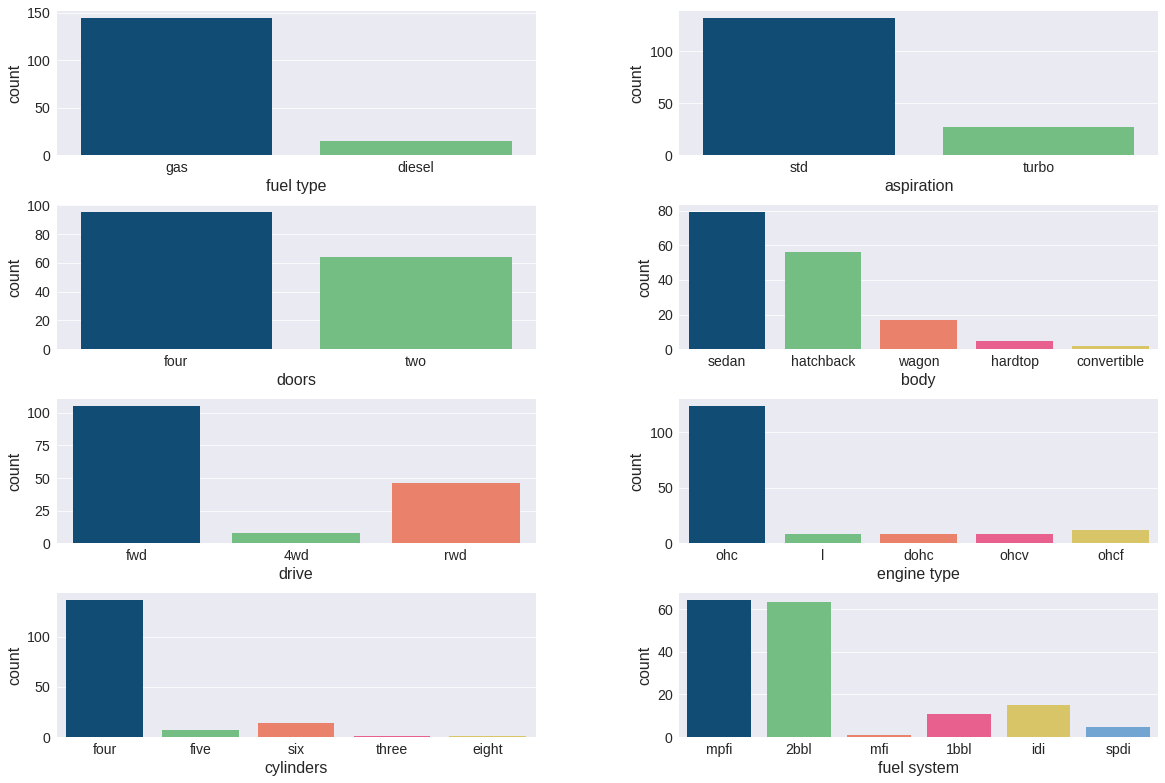

In [27]:
#Distribuição das variáveis categóricas
features = ['make', 'fuel type', 'aspiration', 'doors', 'body',
               'drive', 'engine type', 'cylinders', 'fuel system']
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 12))
for col, ax in zip(features[1:], axs.ravel()):
    sns.countplot(x=col, data=df, ax=ax)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.3)

**>** Com a distribuição dos parâmetros acima, nota-se que:
- há mais carros a gasolina, com aspiração padrão, majoritariamente de 4 portas, com tração dianteira, sistema de comando de válvulas que se localiza na parte superior do motor (ohc), de 4 cilindros, injeção multi ponto e 2bbl (?)
 

**> ** A variável *riskiness* é uma variável que pode ser utilizada como uma variável estratificadora, uma vez que ela separa os carros em 6 categorias.

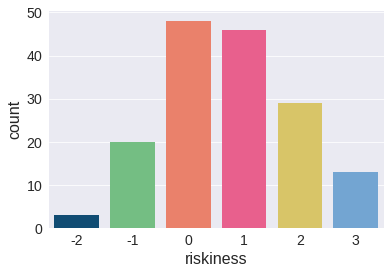

In [59]:
sns.countplot(df["riskiness"])

**>** Distribuição das variáveis categóricas, utilizando a variável **riskiness** como estratificadora:

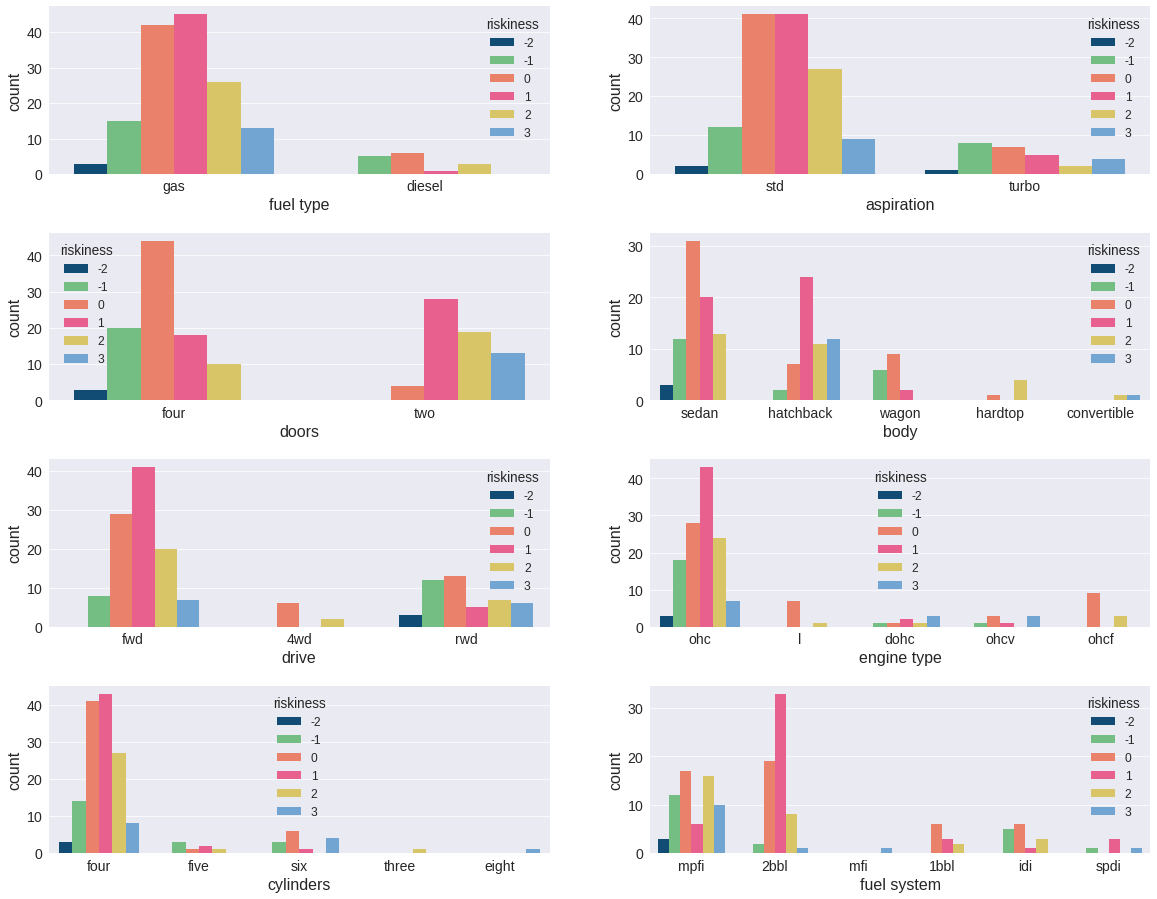

In [33]:
#Distribuição das variáveis categóricas
features = ['make', 'fuel type', 'aspiration', 'doors', 'body',
               'drive', 'engine type', 'cylinders', 'fuel system']
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 14))
for col, ax in zip(features[1:], axs.ravel()):
    sns.countplot(x=col, data=df, ax=ax, hue='riskiness')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.2)

**> ** A variável *riskiness* possui sua distribuição centrada nos valores  *0* e *1*, então era de se esperar que a distribuição das demais variáveis, estratificadas pela primeira, exibesse o mesmo comportamento.

**> **Distribuição das variáveis quantitativas:

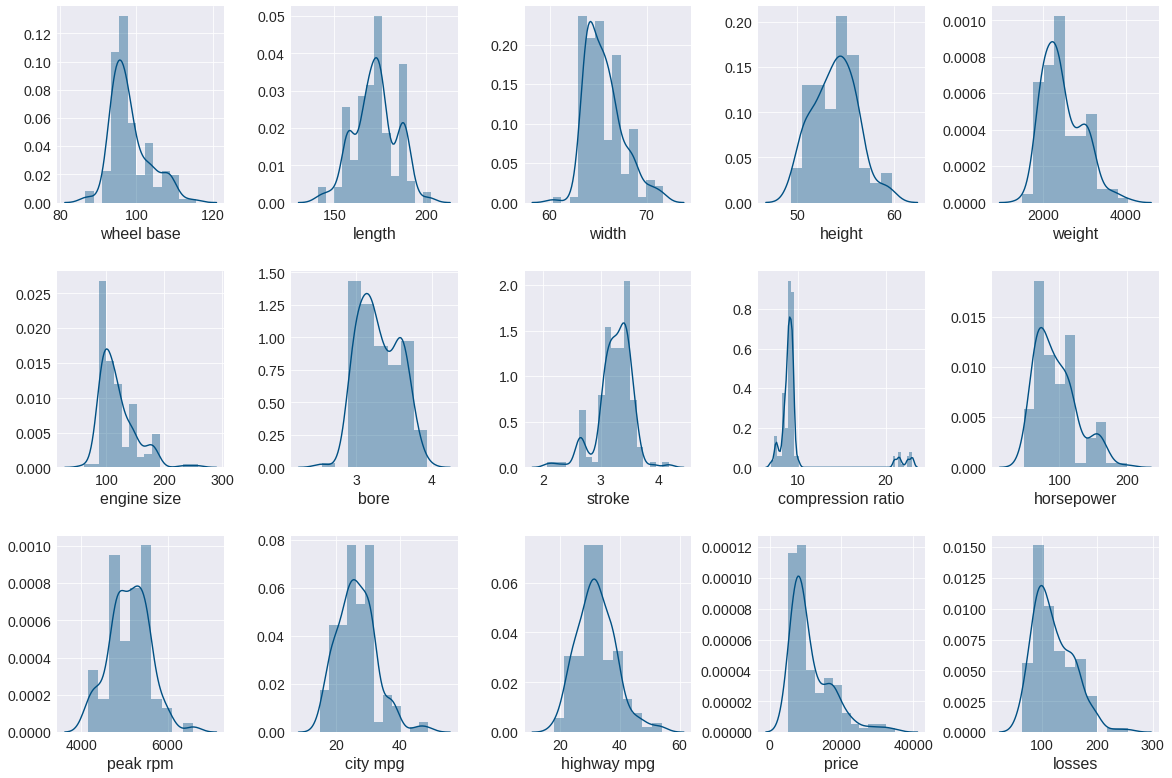

In [60]:
#Distribuição das variáveis quantitativas
features2 = ["wheel base", "wheel base", "length", "width", "height", "weight", "engine size", "bore", "stroke",
             "compression ratio", "horsepower", "peak rpm", "city mpg", "highway mpg", "price","losses"]
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(18, 12))
for col, ax in zip(features2[1:], axs.ravel()):
    x=df.loc[:,col]
    sns.distplot(x, ax=ax)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

***
# Correlações

Após termos feito o reconhecimento do dataset, podemos então começar a explorá-lo, tentando descobrir correlações entre as variáveis.

**>** Inicialmente, podemos verificar qual a correlação entre todas as variáveis quantitativas, utilizando para isso a função **.corr()** do Pandas. Ainda, escolheremos como método o Coeficiente de Spearman.

In [10]:
corr = df.corr(method='spearman')

**>** Para facilitar a visualização das correlações, as apresentamos através do *heatmap* abaixo:

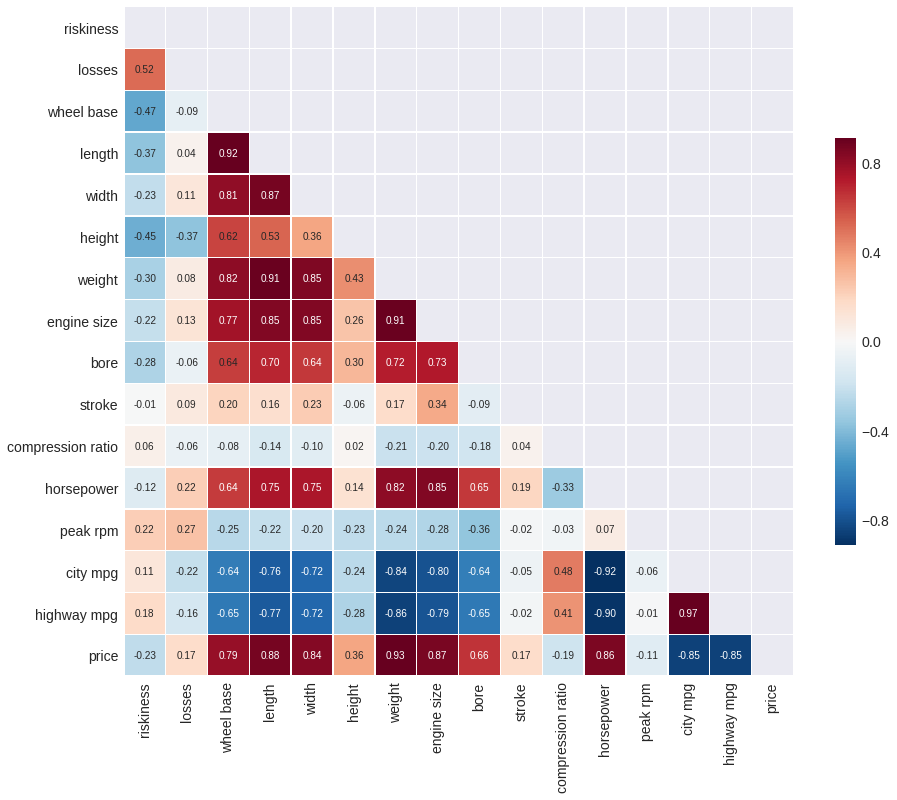

In [63]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

ax = sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, annot_kws={"size":10}, fmt='3.2f')

**>** O *heatmap* mostra que há várias correlações entre as variáveis. Entretanto, é importante verificar que há correlações que são fortes pois uma característica deriva da outra. Por exemplo, as variáveis "length" e "wheel base" possuem uma correlação de **0.92**, mas isso é esperado uma vez que quanto mais longo (lenght) for o automóvel mais distante será os eixos das rodas (wheel base). Assim, as correlações que já eram esperadas são: 
-  lenght x (whell base, width, length, weight)
- Highway mpg x city mpg

**>** Estipulando um valor mínimo de **+-0.6** para que uma correlação seja considerada relevante, e considerando o mencionado acima acerca das propriedades naturalmente correlacionadas, vamos analisar as seguintes variáveis: 
- Price x (Wheel base, engine size, bore, horsepower, city mpg)
- City mpg x (wheel base, engine size, bore, horsepower)
- Horsepower x (weight, engine size, bore)
- Bore x (weight, engine size)

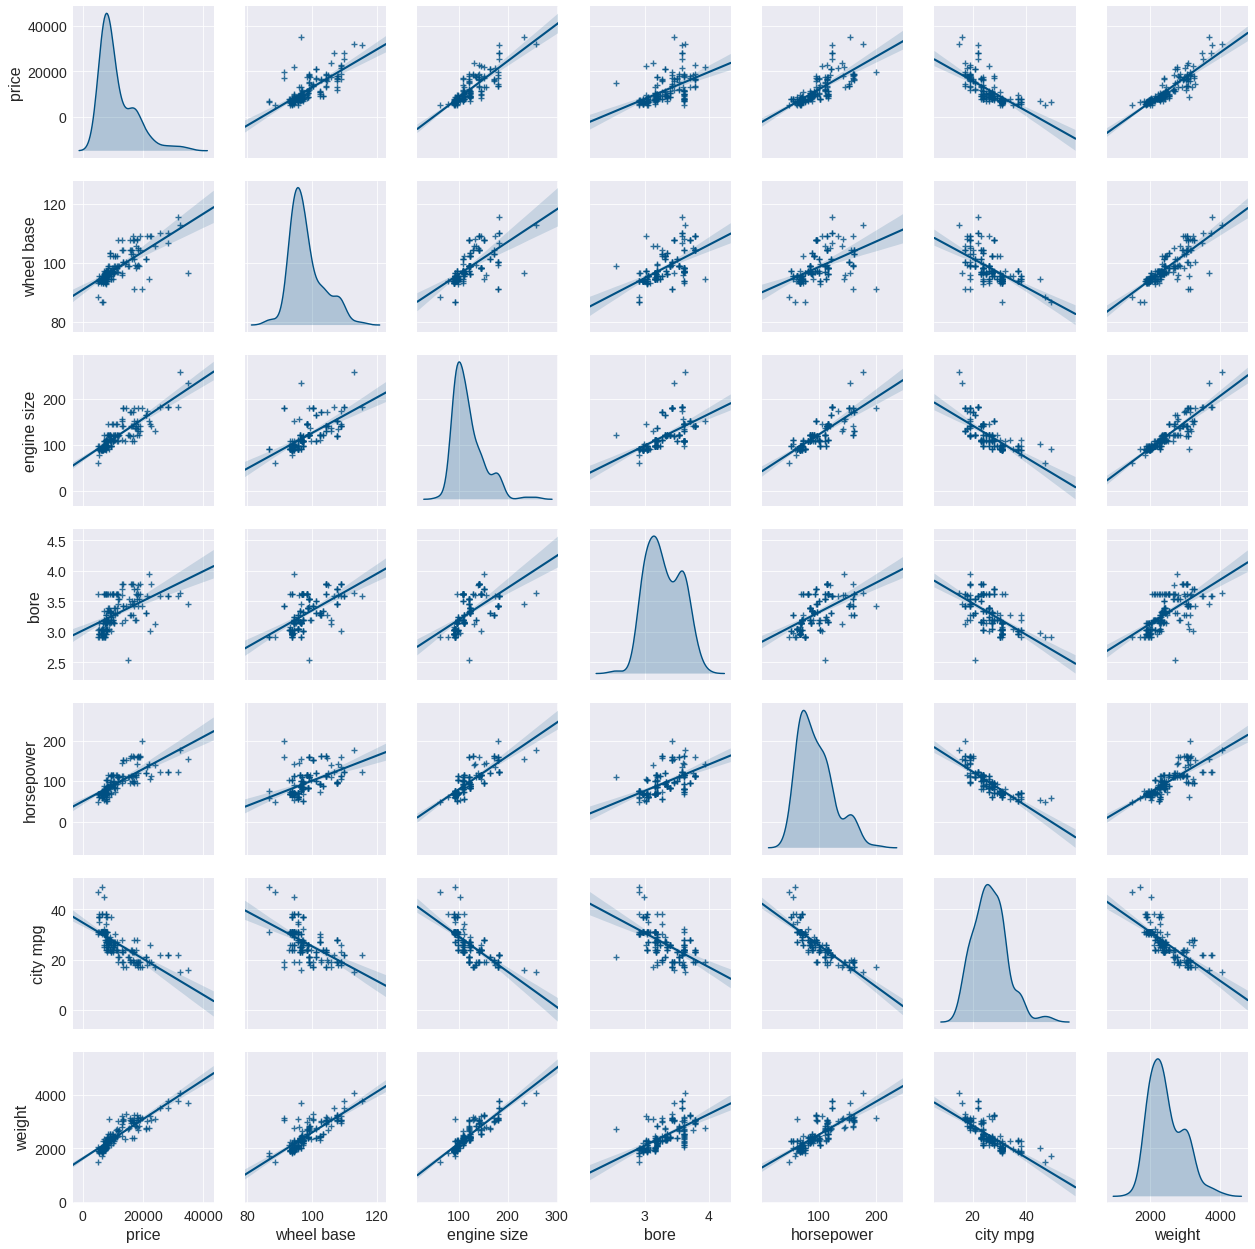

In [12]:
g = sns.pairplot(df, vars=["price", "wheel base", 'engine size', 'bore', 'horsepower','city mpg', 'weight'],
                 kind="reg", diag_kind="kde", markers="+", diag_kws=dict(shade=True))

**>** Como era de se esperar, os preços dos carros têm uma correlação possitiva com parâmetros que tendem a encarecer os produtos. É natural que carros com tamanhos, motores, cilindros e potências maiores sejam mais caros. 

**>** Ainda, é interessante notar que os carros mais econômicos/eficientes na queima de combustível não são os mais caros.

**>** A eficiência da queima de combustível depende inversamente com os parâmetros analisados, visto que carros maiores e motores mais potentes tendem a utilizar mais combustível para o perfeito funcionamento.

**> ** Carros com mais horsepower precisam de motores maiores, cilindros com maior diâmetro e, conseguentemente, são mais pesados

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

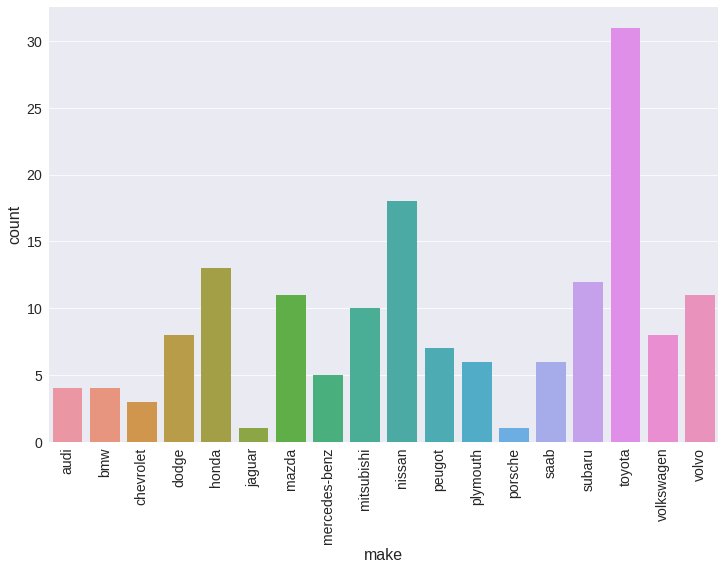

In [64]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)
sns.countplot(x="make", data=df)
plt.xticks(rotation='vertical')

**> ** Por último, mas não menos importante, temos a distribuição dos fabricantes dos carros, onde podemos notar que as 4 maiores montadoras são, em ordem descrescente:
- Toyota
- Nissan
- Honda
- Subaru

Não sabemos exatamente quais foram os critérios utilizados na construção do dataset, mas é interessante notar que as empresas com mais carros na lista são as montadoras asiáticas. 

***
# Análise de Componentes Principais

As análises acima foram feitas "a mão", tentando buscar quais variáveis seriam mais interessantes para analisar. Obviamente, essa não é a melhor maneira.

Assim, iremos testar a aplicabilidade da Análise de Componente Principais (PCA), uma poderosa ferramenta estatı́stica com a qual podemos descrever um conjunto de observáveis possivelmente correlacionados através de uma base de vetores linearmente não correlacionados.

A PCA ajudará a diminuir a dimensionalidade dos parâmetros, podendo ser utilizada como um *proxy* dos parâmetros.


In [67]:
x = df.loc[:,("wheel base", "length", "width", "height", "weight", "engine size", "bore", "stroke", "compression ratio", 
         "horsepower", "peak rpm", "city mpg")].values

# Selecionamos apenas as variáveis contínuas de interesse

In [68]:
x = StandardScaler().fit_transform(x)

In [78]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [71]:
# Concatenando os resultados das PCs 1 e 2 ao dataset original
df_pca = pd.concat([principalDf, df], axis = 1)

In [22]:
pca.explained_variance_ratio_

array([ 0.50599268,  0.16489436])

**> ** Como podemos observar, a PC1 explica pouco mais de 50% dos dados, seguido pela PC2 que explica pouco mais de 16% dos dados.

**> ** Entretanto, como vemos abaixo, a PC1 tem uma boa correlação com a maioria dos parâmetros utilizados na análise, mostrando que pode sim ser utilizado com o *proxy* para a maioria dos dados.

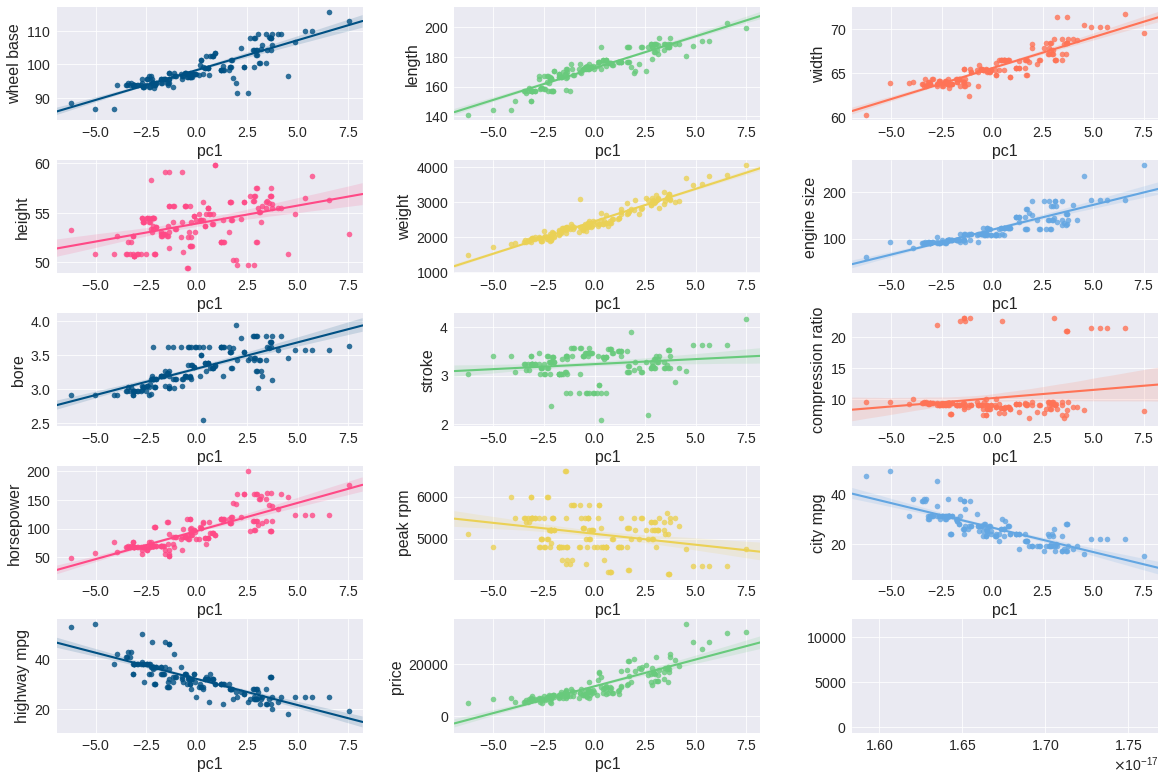

In [100]:
# Correlação da PC1 com os parâmetros físicos/mecânicos

features2 = ["wheel base", "wheel base", "length", "width", "height", "weight", "engine size", "bore", "stroke",
             "compression ratio", "horsepower", "peak rpm", "city mpg", "highway mpg", "price"]
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(18, 12))
for col, ax in zip(features2[1:], axs.ravel()):
    ax = sns.regplot(x="pc1", y=col, data=df_pca, fit_reg=True, ax=ax)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.3)

**> ** A primeira componente principal (PC1) mostra:
- uma boa correlação com wheel base, length, width, weight, engine size
- uma correlação razoável com bore, stroke, horsepower
- uma anticorrelação boa com city mpg, highway mpg
- (anti)correlação mais fraca com height, compression ratio, peak rpm
- ***Ainda que a PCA não tenha sido feita utilizando a variável price, ela se correlaciona bem com a PC1***


In [99]:
x = df.loc[:,("wheel base", "length", "width", "weight", "engine size", "bore", "stroke", 
         "horsepower", "city mpg", "highway mpg")].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

pca.explained_variance_ratio_

array([ 0.68238956,  0.11490535])

**>** Se retiramos as variáveis que apresentam correlações mais fracas com o PC1 e refizermos a PCA, notamos que a nova PC1 passa a explicar quase 70% dos dados.

***
# Classificação do Risco e Desvalorização

Todas as correlações acima são referentes às características físicas e mecânicas do automovéis. Entretanto, entre as variáveis categóricas temos os parâmetros "Riskiness" e "losses", que são referentes aos riscos de contratação de seguro e da desvalorização do automovél as quais temos interesse de entender como se relacionam com as demais.

PAra concluir a nossa análise exploratória, vamos analisar como esses dois parâmetros dependem (ou não) dos demais.

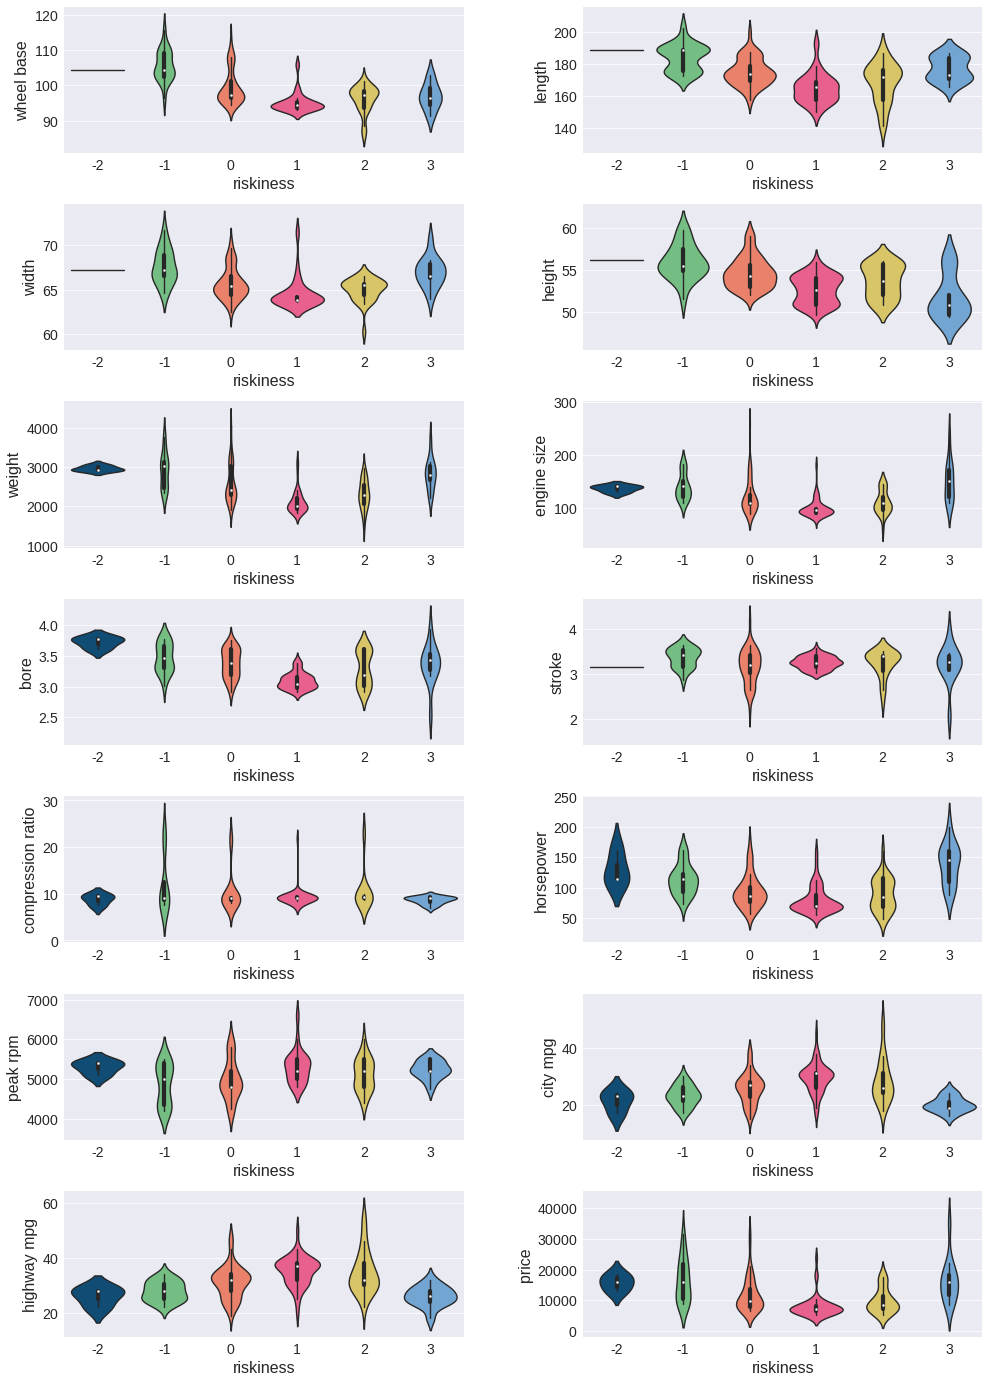

In [106]:
# Correlação da PC1 com os parâmetros físicos/mecânicos

features2 = ["wheel base", "wheel base", "length", "width", "height", "weight", "engine size", "bore", "stroke",
             "compression ratio", "horsepower", "peak rpm", "city mpg", "highway mpg", "price"]
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(15, 22))
for col, ax in zip(features2[1:], axs.ravel()):
    ax = sns.violinplot(x="riskiness", y=col, data=df_pca, fit_reg=True, ax=ax)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.3)

**> ** Analisando os violinplots da *riskiness* com as demais variáveis podemos notar que:
- Carros mais curtos ('wheel base', 'length') e mais baixos (height) parecem ter a tendência a ter uma maior risco associado **>>** talvez por serem mais instáveis que carros longo ou terem uma aerodinâmica mais baixa que favoreça maiores velocidades? 
- Com excessão do risco 3, carros que mais eficientes na estrada (e na cidade) também tendem a ter um risco maior **>** carros muito potentes costumam consumir mais combustível e justificaria o risco 3 para carros com menores taxa de efici

/home/pnovais/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:478: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

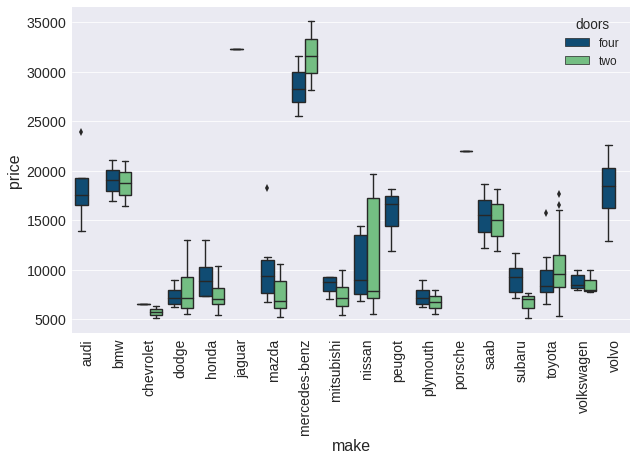

In [25]:
fig=plt.figure()
fig.set_figheight(6)
fig.set_figwidth(10)
sns.boxplot(x="make", y="price", data=df, hue='doors')
plt.xticks(rotation='vertical')

In [26]:
fim = time.time()
time_proc = fim - ini
print('')
#print(bcolors.FAIL +'-'*79+ bcolors.ENDC)
print('-------------------')
print('tempo de processamento: %fmin' %(time_proc/60))
print('-------------------')
today = datetime.datetime.now()
print('Hoje é %s/%s/%s, às %s:%s' %(today.day,today.month, today.year, today.hour, today.minute))


-------------------
tempo de processamento: 0.428210min
-------------------
Hoje é 7/5/2018, às 18:57
